In [104]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf
yf.pdr_override()

In [105]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [106]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [107]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,149.286216,151.341633,147.416215,149.457649,149.053167,8.042689e+07
std,10.702019,10.586092,10.764615,10.691584,10.647039,2.448741e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.110001,143.854996,139.949997,142.464996,141.973434,6.477530e+07
50%,148.869995,150.919998,147.240005,149.350006,148.910004,7.491780e+07
75%,156.275002,158.154999,154.164993,156.779999,155.852943,8.904005e+07
max,173.750000,176.149994,173.119995,174.550003,173.995270,1.826020e+08


In [108]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-04-14 to 2023-04-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

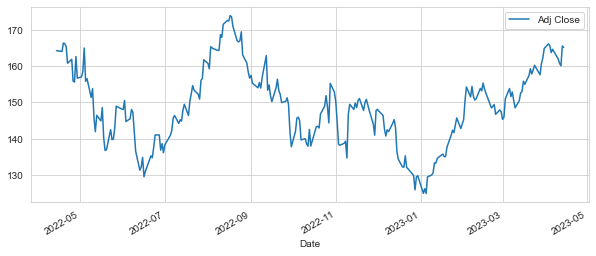

In [109]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

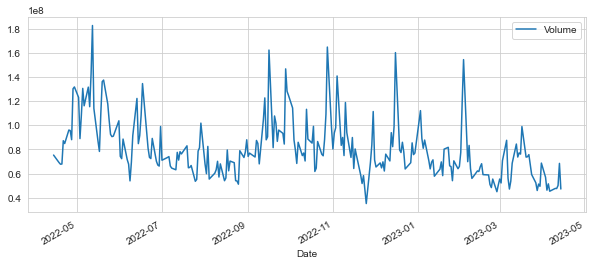

In [110]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [111]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = "MA for %s days" % ma
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

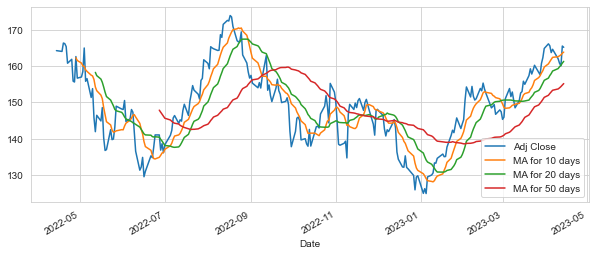

In [112]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots = False, figsize = (10,4))

<AxesSubplot:xlabel='Date'>

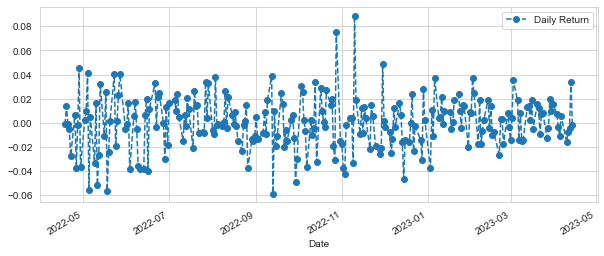

In [113]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend = True, linestyle='--',marker='o')

C:\Users\Operator\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

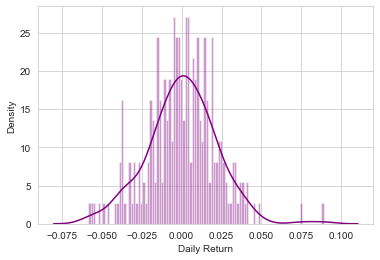

In [114]:
 sns.distplot(AAPL['Daily Return'].dropna(), bins=100,color='purple')

<AxesSubplot:>

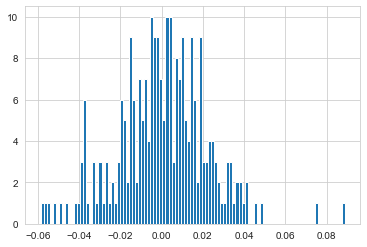

In [115]:
AAPL['Daily Return'].hist(bins=100)

In [116]:
closing_df = pdr.get_data_yahoo(tech_list, start,end)['Adj Close']

[*********************100%***********************]  4 of 4 completed


In [117]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-14,164.294739,151.706497,127.252998,277.111450
2022-04-18,164.076080,152.785004,127.960999,277.794739
2022-04-19,166.392044,158.115494,130.531006,282.528320
2022-04-20,166.223068,153.998001,128.245499,283.578003
2022-04-21,165.417938,148.296005,124.937500,278.081909


In [118]:
tech_rets = closing_df.pct_change()

In [119]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-14,NaN,NaN,NaN,NaN
2022-04-18,-0.001331,0.007109,0.005564,0.002466
2022-04-19,0.014115,0.034889,0.020084,0.017040
2022-04-20,-0.001016,-0.026041,-0.017509,0.003715
2022-04-21,-0.004844,-0.037026,-0.025794,-0.019381


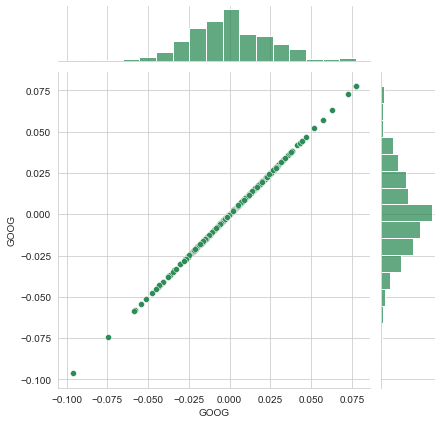

In [120]:
sns.jointplot(data = tech_rets, x = 'GOOG', y = 'GOOG', color = 'seagreen')

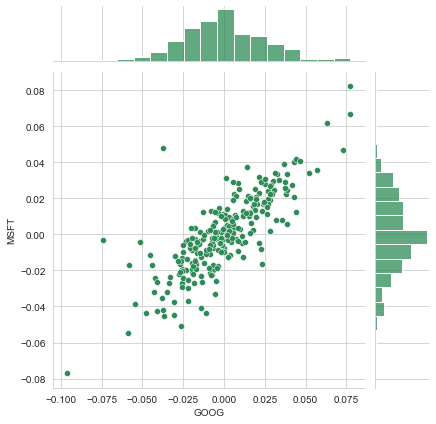

In [121]:
sns.jointplot(data = tech_rets, x = 'GOOG', y = 'MSFT', color = 'seagreen')

In [122]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-14,NaN,NaN,NaN,NaN
2022-04-18,-0.001331,0.007109,0.005564,0.002466
2022-04-19,0.014115,0.034889,0.020084,0.017040
2022-04-20,-0.001016,-0.026041,-0.017509,0.003715
2022-04-21,-0.004844,-0.037026,-0.025794,-0.019381


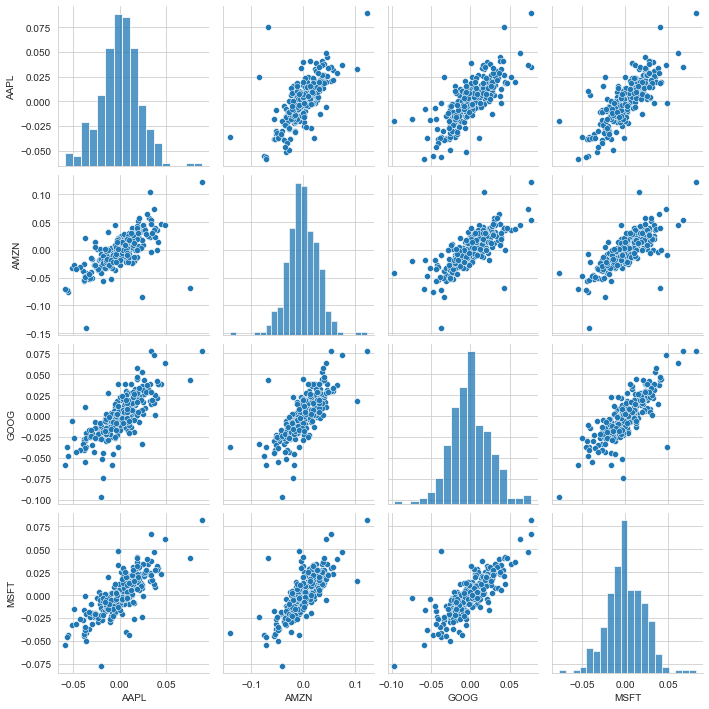

In [123]:
sns.pairplot(tech_rets.dropna())

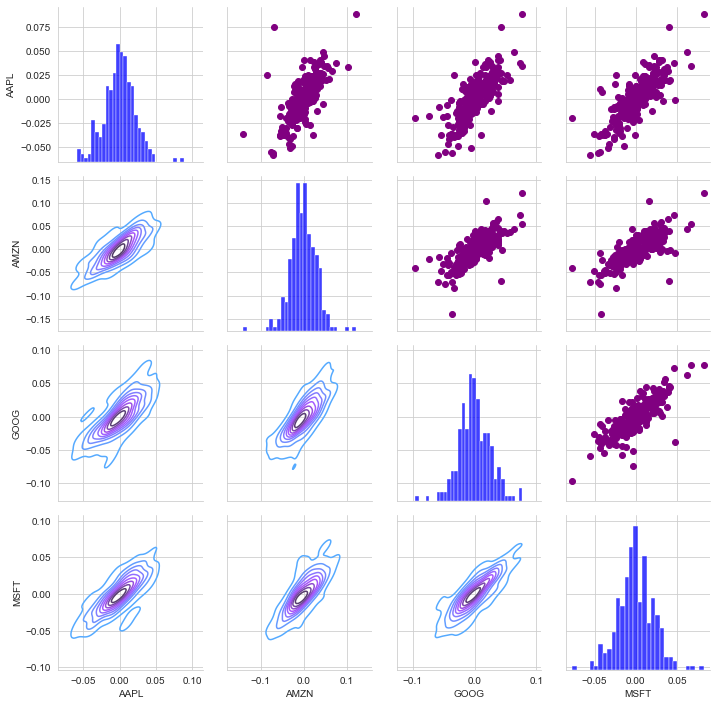

In [124]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(sns.histplot, bins=30, color='blue')

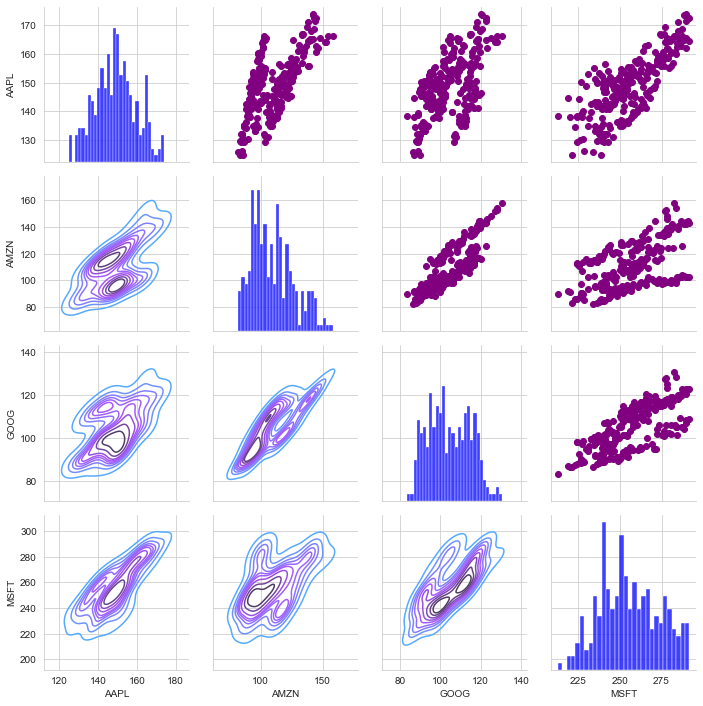

In [125]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(sns.histplot, bins=30, color='blue')

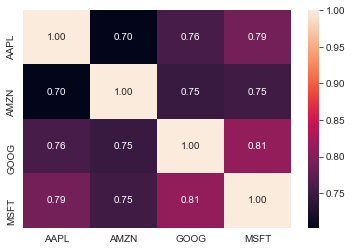

In [126]:
tech_rets_corr= tech_rets.dropna().corr()
sns.heatmap(tech_rets_corr, annot=True, fmt='.2f')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

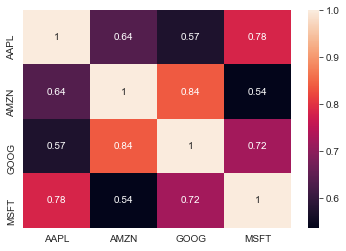

In [127]:
closing_df_corr = closing_df.dropna().corr()
sns.heatmap(closing_df_corr, annot=True)
plt.show

In [128]:
rets = tech_rets.dropna()

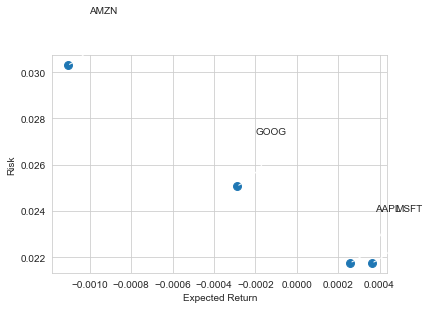

In [129]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns, rets.mean(),rets.std()):
    plt.annotate(
    label,xy = (x,y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3, rad=-0.3'))


C:\Users\Operator\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

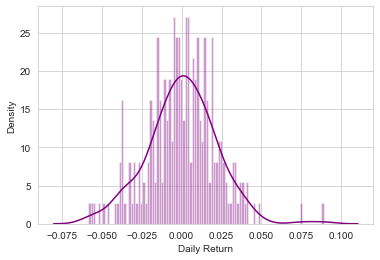

In [130]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [131]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-04-18,-0.001331,0.007109,0.005564,0.002466
2022-04-19,0.014115,0.034889,0.020084,0.017040
2022-04-20,-0.001016,-0.026041,-0.017509,0.003715
2022-04-21,-0.004844,-0.037026,-0.025794,-0.019381
2022-04-22,-0.027821,-0.026609,-0.042609,-0.024144


In [132]:
rets['AAPL'].quantile(0.05)

-0.037370278099558195

In [133]:
days =365
dt = 1/days
mu = rets.mean()
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [138]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [139]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-14,130.649506,130.710251,127.111504,127.252998,127.252998,23484000
2022-04-18,127.410004,128.712006,126.578453,127.960999,127.960999,14918000
2022-04-19,128.076996,130.903748,127.451500,130.531006,130.531006,22720000
2022-04-20,131.283997,131.923492,127.894051,128.245499,128.245499,22610000
2022-04-21,129.350006,130.307495,124.650002,124.937500,124.937500,30158000


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

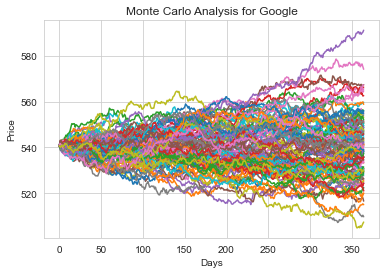

In [140]:
start_price = 540.74

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [143]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
    

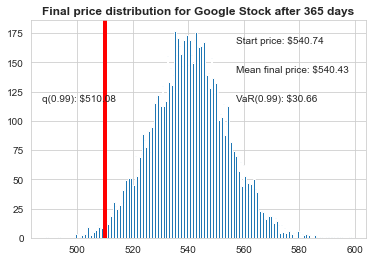

In [144]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())


plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))


plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)


plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');